In [1]:
'''
【课程3.3.2】  最邻近分类的python实现方法

在距离空间里，如果一个样本的最接近的k个邻居里，绝大多数属于某个类别，则该样本也属于这个类别

电影分类 / 植物分类

'''

'\n【课程3.3.2】  最邻近分类的python实现方法\n\n在距离空间里，如果一个样本的最接近的k个邻居里，绝大多数属于某个类别，则该样本也属于这个类别\n\n电影分类 / 植物分类\n\n'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

      name  fight  kiss     type
0  北京遇上西雅图      3   104  Romance
1      喜欢你      2   100  Romance
2    疯狂动物城      1    81  Romance
3      战狼2    101    10   Action
4       力王     99     5   Action
5      敢死队     98     2   Action
-------


Text(18, 90, '《你的名字》')

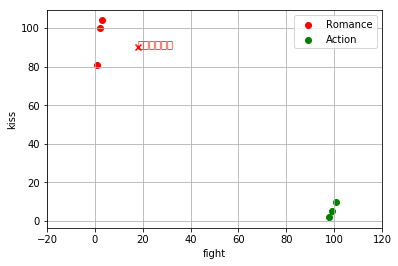

In [17]:
#  案例一：电影数据分类

from sklearn import neighbors  # 导入KNN分类模块
import warnings
warnings.filterwarnings('ignore') 
# 不发出警告

data = pd.DataFrame({'name':['北京遇上西雅图','喜欢你','疯狂动物城','战狼2','力王','敢死队'],
                  'fight':[3,2,1,101,99,98],
                  'kiss':[104,100,81,10,5,2],
                  'type':['Romance','Romance','Romance','Action','Action','Action']})
print(data)
print('-------')
#  创建数据

plt.scatter(data[data['type'] == 'Romance']['fight'],data[data['type'] == 'Romance']['kiss'],color = 'r',marker = 'o',label = 'Romance')
plt.scatter(data[data['type'] == 'Action']['fight'],data[data['type'] == 'Action']['kiss'],color = 'g',marker = 'o',label = 'Action')
plt.xlim(-20,120)
plt.grid()
plt.legend()

knn = neighbors.KNeighborsClassifier()
knn.fit(data[['fight','kiss']],data['type'])

knn.predict([[18,90]])
plt.scatter(18,90,color = 'r',marker = 'x',label = 'Romance')
plt.ylabel('kiss')
plt.xlabel('fight')
plt.text(18,90,'《你的名字》',color = 'r')
# 绘制图表

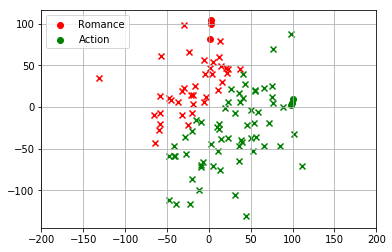

In [27]:
data2 = pd.DataFrame(np.random.randn(100,2)*50,columns = ['fight','kiss'])
data2['typetest'] = knn.predict(data2)
data2.head()

plt.scatter(data[data['type'] == 'Romance']['fight'],data[data['type'] == 'Romance']['kiss'],color = 'r',marker = 'o',label = 'Romance')
plt.scatter(data[data['type'] == 'Action']['fight'],data[data['type'] == 'Action']['kiss'],color = 'g',marker = 'o',label = 'Action')
plt.xlim(-200,200)
plt.grid()
plt.legend()
plt.scatter(data2[data2['typetest'] == 'Romance']['fight'],data2[data2['typetest'] == 'Romance']['kiss'],color = 'r',marker = 'x',label = 'Romance')
plt.scatter(data2[data2['typetest'] == 'Action']['fight'],data2[data2['typetest'] == 'Action']['kiss'],color = 'g',marker = 'x',label = 'Action')


In [31]:
# 案例二：植物分类

from sklearn import datasets
iris = datasets.load_iris()
print(iris.keys())
print('数据长度为:%i条' % len(iris['data']))
# 导入数据

print(iris.feature_names)
print(iris.target_names)
#print(iris.target)
print(iris.data[:5])
# 150个实例数据
# feature_names - 特征分类：萼片长度，萼片宽度，花瓣长度，花瓣宽度  → sepal length, sepal width, petal length, petal width
# 目标类别：Iris setosa, Iris versicolor, Iris virginica. 
data = pd.DataFrame(iris.data,columns = iris.feature_names)
data['target'] = iris.target
data.head()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
数据长度为:150条
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
knn = neighbors.KNeighborsClassifier()
knn.fit(iris.data,iris.target)

pre_dict = knn.predict([[0.2,0.1,0.3,0.4]])
pre_dict

array([0])